## Introduction to Data Science

#### University of Redlands - DATA 101
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data101.joannabieri.com](https://joannabieri.com/data101.html)

---------------------------------------
# Homework Day 8
---------------------------------------

GOALS:

1. Load data into Python that you find online
2. Understand data types and fix some errors
3. Find your own data to play with

----------------------------------------------------------

This homework has **5 questions** and **1 problem**.

NOTE: Be kind to yourself. Working with data can be hard! Every data set is different. **Seriously** come get help! Come to lab!


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

## Try reading in some data - csv

Go to the [Cal Fire Website](https://www.fire.ca.gov/incidents) and scroll to the bottom to see the Incident Data. We will download the file named **ALL DATA AS CSV** this should put the data file into your Downloads folder. 

Next you need to move the file **mapdataall.csv** from your Downloads folder into your Day8 folder where you are doing your homework. You can open your Downloads folder and drag the file into JupyterLab side bar. Then I can run the command

    DF_raw = pd.read_csv('mapdataall.csv')

to load the data and look at the data frame.

**Q1** How many variables and observations?

**Q2** How many different incident types are there?

**Q3** Make a histogram of the acres burned and color the bars by whether or not the incident was a calfire incident. You will probably need to make a mask to remove very small and very large fires. How many fires burned more than 100,000 acres? What is the largest fire in the data?

**Extra Q** EXTRA - CHALLENGE - See if you can create a graph that answers the question: Are fires getting bigger or more frequent over time? You get complete creative control on how to answer this question!

Q1. There are 23 variables, and 2732 observations.
Q2. There are 3 different incident type. They are Wildfire, Fire, and Flood.
Q3. 16 fires burned more than 100,000 acres. The largest fire in the data was August complex which burned 1,032,658 acres, but the largest fire that was in my hisogram was SCU Lightning Complex at 396624 acres burned.

In [2]:
DF_raw = pd.read_csv('mapdataall.csv')
show(DF_raw)

In [20]:
#How many variables and observations?
print(DF_raw.shape)

(2732, 23)


In [342]:
#How many different incident types are there?
DF_raw['incident_type'].value_counts()

incident_type
Wildfire    1468
Fire          29
Flood          1
Name: count, dtype: int64

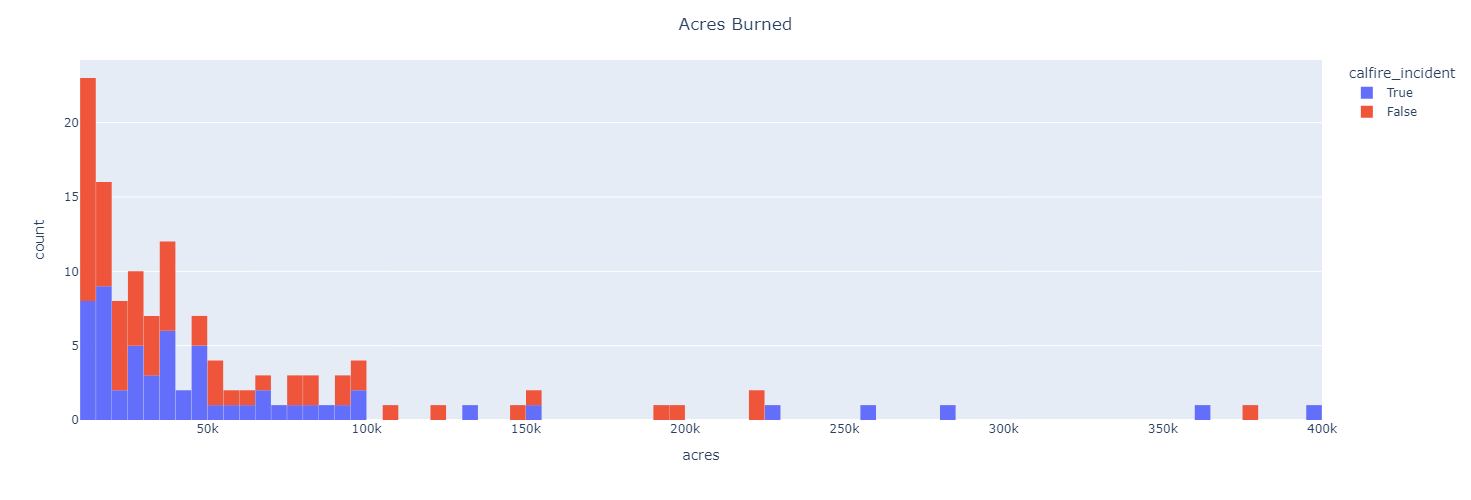

,incident_name,incident_acres_burned
1660,SCU Lightning Complex,396624.0
1683,Creek Fire,379895.0
1666,LNU Lightning Complex,363220.0
884,Thomas Fire,281893.0
122,Rim Fire,257314.0
...,...,...
108,Deer Fire,11429.0
2379,Fresno June Lightning Complex,10616.0
1820,Tennant Fire,10580.0
289,Dodge Fire,10570.0


In [385]:
### Make a histogram of the acres burned and color the bars by whether or not the incident was a calfire incident. 
#You will probably need to make a mask to remove very small and very large fires. 
#How many fires burned more than 100,000 acres? 
#What is the largest fire in the data?
mask_acres = (DF_raw['incident_acres_burned'] < 400000) & (DF_raw['incident_acres_burned'] > 10000)
DF_acres = DF_raw[mask_acres]
fig = px.histogram(DF_acres,
                   x='incident_acres_burned',
                   nbins = 100,
                   color='calfire_incident')

fig.update_layout(bargap=0.02,
                  title='Acres Burned',
                  title_x=0.5,
                  xaxis_title='acres',
                  autosize=False,
                  width=800,
                  height=500)

fig.show()


my_columns = ['incident_name', 'incident_acres_burned']
DF_acres[my_columns].sort_values('incident_acres_burned', ascending=False)

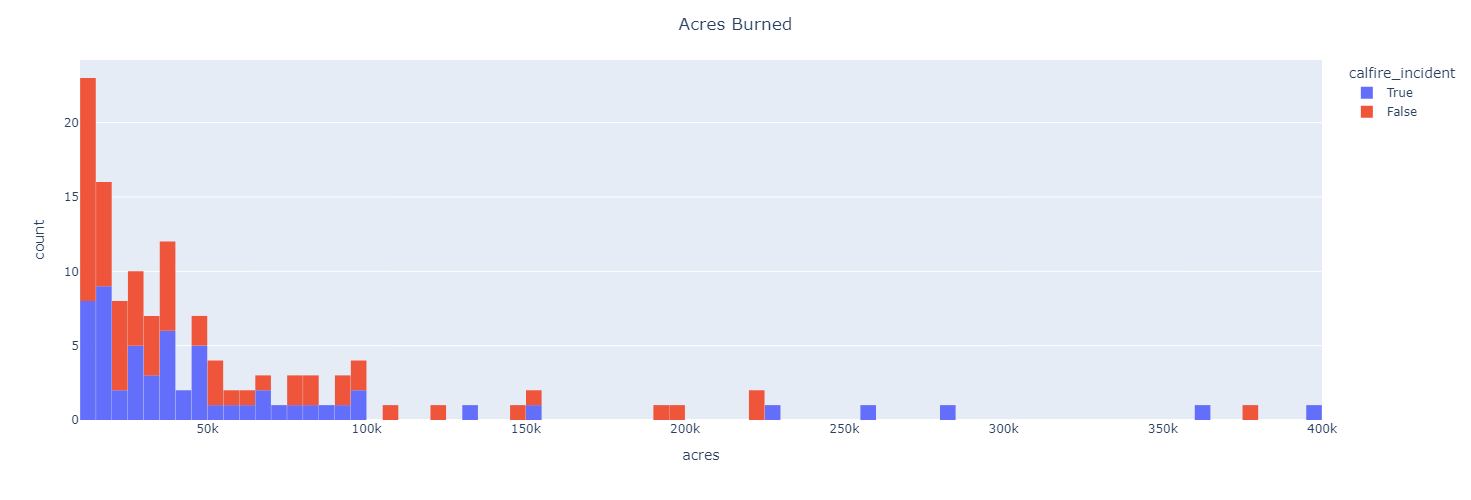

,incident_name,incident_acres_burned
1653,August Complex (includes Doe Fire),1032648.0
1841,Dixie Fire,963309.0
2551,Park Fire,429603.0
1099,Ranch Fire (Mendocino Complex),410203.0
1660,SCU Lightning Complex,396624.0
...,...,...
2177,Avenales Fire,NaN
2178,King Fire,NaN
2184,Midway Fire,NaN
2198,Marsh Fire,NaN


In [365]:
#### Make a histogram of the acres burned and color the bars by whether or not the incident was a calfire incident. 
#You will probably need to make a mask to remove very small and very large fires. 
#How many fires burned more than 100,000 acres? 
#What is the largest fire in the data?
mask_acres = (DF_raw['incident_acres_burned'] < 400000) & (DF_raw['incident_acres_burned'] > 10000)
DF_acres = DF_raw[mask_acres]
fig = px.histogram(DF_acres,
                   x='incident_acres_burned',
                   nbins = 100,
                   color='calfire_incident')

fig.update_layout(bargap=0.02,
                  title='Acres Burned',
                  title_x=0.5,
                  xaxis_title='acres',
                  autosize=False,
                  width=800,
                  height=500)

fig.show()
#Q3. Sixteen fires burned more than 100,000 acres

my_columns = ['incident_name', 'incident_acres_burned']
DF_raw[my_columns].sort_values('incident_acres_burned', ascending=False)
#Q3. The largest fire in the data was August complex which burned 1,032,658 acres.

## Try reading in some data from Wikipedia - html

Here we will explore academy award winning films. Go to the [Wiki for the List of Academy Award Winning Films](https://en.wikipedia.org/wiki/List_of_Academy_Award%E2%80%93winning_films). Look at what type of data is there. How many tables? Any weird looking data?

Now read the html data into Python and show the data in DF[0]

In [262]:
# Your code here


In [5]:
# Here is some helper code
# This is code that will read in the data and then fix the Year column
my_website = "https://en.wikipedia.org/wiki/List_of_Academy_Award%E2%80%93winning_films"
DF = pd.read_html(my_website)
DF_raw = DF[0]
DF_raw['Year'] = DF_raw['Year'].apply(lambda x: int(x.split('/')[0]))
DF_raw['Year'].value_counts().reset_index().rename(columns={"index": "value", 0: "count"})

,Year,count
0,1945,21
1,1949,20
2,1942,20
3,1950,19
4,1948,19
...,...,...
91,1931,10
92,1932,9
93,1928,7
94,1929,6


**Q4** Following along with the lecture notes or video, fix the data in the 'Awards' column.

In [13]:
DF_raw.dtypes

Film           object
Year            int64
Awards          int64
Nominations    object
dtype: object

In [11]:
DF_raw['Awards'] = DF_raw['Awards'].apply(lambda x: int(x.split('(')[0]))
DF_raw['Awards'].value_counts().reset_index().rename(columns={"index": "value", 0: "count"})


,Awards,count
0,1,987
1,2,157
2,3,78
3,4,48
4,0,36
5,5,26
6,7,13
7,6,13
8,8,8
9,11,3


**Q5** Now try to fix the data in the "Nominations" column - see if you can do it without looking at the answer.

In [17]:
DF_raw['Nominations'] = DF_raw['Nominations'].apply(lambda x: int(x.split('[')[0]))
DF_raw['Nominations'].value_counts().reset_index().rename(columns={"index": "value", 0: "count"})


,Nominations,count
0,1,553
1,2,141
2,4,115
3,5,104
4,3,104
5,6,80
6,7,75
7,8,61
8,10,40
9,9,31


## Problem 1

Your homework today will be to see if you can find some data of your own. This can be the first steps you take toward your final project. 

You should:

* Find some data online
* Read that data into Python using the Pandas commands we learned
* Look at the DataFrame - number of variables, number of observations, AND the dtypes. Comment on what you see.
* Try to do summary statistics (.describe()). Does it work like expected?
* Attempt to fix any data, or explain why the data does not need to be fixed.
* Make some sort of graph using columns in your data.

In [69]:
my_website = "https://en.wikipedia.org/wiki/Educational_attainment_in_the_United_States"
DF = pd.read_html(my_website)
DF_raw = DF[4]
show(DF_raw)

In [71]:
DF_raw.shape
#There are 12 variables and 16 observations.

(16, 12)

In [73]:
DF_raw['Overall Median'].value_counts()
#The dtypes for Overall Median are different dollar values since every year has different results.

Overall Median
$56,965    1
$56,197    1
$58,881    1
$60,849    1
$64,474    1
$63,100    1
$62,726    1
$62,618    1
$63,566    1
$60,884    1
$58,376    1
$58,515    1
$62,636    1
$65,314    1
$70,308    1
$61,694    1
Name: count, dtype: int64

In [75]:
DF_raw.describe()
#Yes describe works as expected
#Data does not need to be fixed since the describe fits what the chart shows

,Year,Overall Median,Less than 9th grade,High school drop-out,High school graduate,Some college,Associate degree,Bachelor's degree,Bachelor's degree or more,Master's degree,Professional degree,Doctorate degree
count,16,16,16,16,16,16,16,16,16,16,16,16
unique,16,16,16,16,16,16,16,16,16,16,12,15
top,1991,"$56,965","$24,270","$32,189","$52,293","$64,525","$72,877","$89,407","$95,952","$101,281",(Not avail.),(Not avail.)
freq,1,1,1,1,1,1,1,1,1,1,5,2


In [79]:
fig = px.histogram(DF,
                    x='Overall Median')
fig.show()


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (28,) + inhomogeneous part.